<a href="https://colab.research.google.com/github/manishsingh7163/Analysis-on-Satellite-Image/blob/Analysis-on-Satellite-Image/Light_Illumination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geo Json

In [13]:
!pip install rasterio


In [14]:
!pip install earthpy

In [15]:
import geopandas as gpd
bang = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data_taskDataExtracted/geoJSONGrids.geojson')
print(bang.head(1))

      citygrid_num  ...                                           geometry
0  bang_cell_17024  ...  POLYGON ((77.45932 12.90577, 77.46349 12.90577...

[1 rows x 7 columns]


In [16]:
bang.head()

citygrid_num  ...                                           geometry
0  bang_cell_17024  ...  POLYGON ((77.45932 12.90577, 77.46349 12.90577...
1  bang_cell_17025  ...  POLYGON ((77.45932 12.90160, 77.46349 12.90160...
2  bang_cell_17245  ...  POLYGON ((77.46349 12.90994, 77.46765 12.90994...
3  bang_cell_17246  ...  POLYGON ((77.46349 12.90577, 77.46765 12.90577...
4  bang_cell_17247  ...  POLYGON ((77.46349 12.90160, 77.46765 12.90160...

[5 rows x 7 columns]

In [17]:
for i in range(10):
  print(bang.geometry[i])

POLYGON ((77.45931939524985 12.90576991644215, 77.46348606524985 12.90576991644215, 77.46348606524985 12.90160324644215, 77.45931939524985 12.90160324644215, 77.45931939524985 12.90576991644215))
POLYGON ((77.45931939524985 12.90160324644215, 77.46348606524985 12.90160324644215, 77.46348606524985 12.89743657644215, 77.45931939524985 12.89743657644215, 77.45931939524985 12.90160324644215))
POLYGON ((77.46348606524985 12.90993658644215, 77.46765273524986 12.90993658644215, 77.46765273524986 12.90576991644215, 77.46348606524985 12.90576991644215, 77.46348606524985 12.90993658644215))
POLYGON ((77.46348606524985 12.90576991644215, 77.46765273524986 12.90576991644215, 77.46765273524986 12.90160324644215, 77.46348606524985 12.90160324644215, 77.46348606524985 12.90576991644215))
POLYGON ((77.46348606524985 12.90160324644215, 77.46765273524986 12.90160324644215, 77.46765273524986 12.89743657644215, 77.46348606524985 12.89743657644215, 77.46348606524985 12.90160324644215))
POLYGON ((77.4634860

In [18]:
bang.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   citygrid_num       3417 non-null   object  
 1   wd_s_d_sd_tv_ward  3417 non-null   object  
 2   wd_ward_name       3417 non-null   object  
 3   wd_city_name       3417 non-null   object  
 4   latitude           3417 non-null   float64 
 5   longitude          3417 non-null   float64 
 6   geometry           3417 non-null   geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 187.0+ KB


In [19]:
bang.describe()

latitude    longitude
count  3417.000000  3417.000000
mean     12.978952    77.603650
std       0.068187     0.073653
min      12.837020    77.461403
25%      12.924520    77.548903
50%      12.974520    77.598903
75%      13.028687    77.653070
max      13.141187    77.782236

In [20]:
bang.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

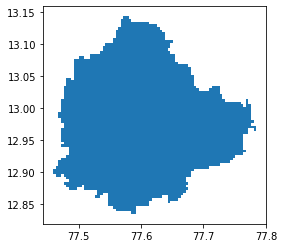

In [21]:
bang.plot();

# Tif File Anaysis

In [22]:
from osgeo import gdal, ogr, osr
import pandas as pd
import numpy as np

In [23]:
def read_raster(raster_file):
    """
    Function
    --------
    read_raster

    Given a raster file, get the pixel size, pixel location, and pixel value

    Parameters
    ----------
    raster_file : string
        Path to the raster file

    Returns
    -------
    x_size : float
        Pixel size
    top_left_x_coords : numpy.ndarray  shape: (number of columns,)
        Longitude of the top-left point in each pixel
    top_left_y_coords : numpy.ndarray  shape: (number of rows,)
        Latitude of the top-left point in each pixel
    centroid_x_coords : numpy.ndarray  shape: (number of columns,)
        Longitude of the centroid in each pixel
    centroid_y_coords : numpy.ndarray  shape: (number of rows,)
        Latitude of the centroid in each pixel
    bands_data : numpy.ndarray  shape: (number of rows, number of columns, 1)
        Pixel value
    """
    raster_dataset = gdal.Open(raster_file, gdal.GA_ReadOnly)
    # get project coordination
    proj = raster_dataset.GetProjectionRef()
    bands_data = []
    # Loop through all raster bands
    for b in range(1, raster_dataset.RasterCount + 1):
        band = raster_dataset.GetRasterBand(b)
        bands_data.append(band.ReadAsArray())
        no_data_value = band.GetNoDataValue()
    bands_data = np.dstack(bands_data)
    rows, cols, n_bands = bands_data.shape

    # Get the metadata of the raster
    geo_transform = raster_dataset.GetGeoTransform()
    (upper_left_x, x_size, x_rotation, upper_left_y, y_rotation, y_size) = geo_transform
    
    # Get location of each pixel
    x_size = 1.0 / int(round(1 / float(x_size)))
    y_size = - x_size
    y_index = np.arange(bands_data.shape[0])
    x_index = np.arange(bands_data.shape[1])
    top_left_x_coords = upper_left_x + x_index * x_size
    top_left_y_coords = upper_left_y + y_index * y_size
    # Add half of the cell size to get the centroid of the cell
    centroid_x_coords = top_left_x_coords + (x_size / 2)
    centroid_y_coords = top_left_y_coords + (y_size / 2)

    return (x_size, top_left_x_coords, top_left_y_coords, centroid_x_coords, centroid_y_coords, bands_data)

In [24]:
def get_cell_idx(lon, lat, top_left_x_coords, top_left_y_coords):
    """
    Function
    --------
    get_cell_idx

    Given a point location and all the pixel locations of the raster file,
    get the column and row index of the point in the raster

    Parameters
    ----------
    lon : float
        Longitude of the point
    lat : float
        Latitude of the point
    top_left_x_coords : numpy.ndarray  shape: (number of columns,)
        Longitude of the top-left point in each pixel
    top_left_y_coords : numpy.ndarray  shape: (number of rows,)
        Latitude of the top-left point in each pixel
    
    Returns
    -------
    lon_idx : int
        Column index
    lat_idx : int
        Row index
    """
    lon_idx = np.where(top_left_x_coords < lon)[0][-1]
    lat_idx = np.where(top_left_y_coords > lat)[0][-1]
    return lon_idx, lat_idx

In [25]:
raster_file = '/content/drive/MyDrive/Colab Notebooks/data_taskDataExtracted/Sky2019.tif'
x_size, top_left_x_coords, top_left_y_coords, centroid_x_coords, centroid_y_coords, bands_data = read_raster(raster_file)

In [26]:
np.savez('/content/drive/MyDrive/Colab Notebooks/data_taskDataExtracted/nightlight.npz', top_left_x_coords=top_left_x_coords, top_left_y_coords=top_left_y_coords, bands_data=bands_data)

In [27]:
print(bands_data.shape)
print('Max light intensity: ',bands_data.max())
print('Min light intensity: ',bands_data.min())

(175, 193, 1)
Max light intensity:  165.31
Min light intensity:  0.0


In [28]:
bands_data[1,0,0]

1.45

In [29]:
def get_nightlight_feature(sample):
    idx, x, y = sample
    lon_idx, lat_idx = get_cell_idx(x, y, top_left_x_coords, top_left_y_coords)
    # Select the 10 * 10 pixels
    left_idx = lon_idx - 5
    right_idx = lon_idx + 4
    up_idx = lat_idx - 5
    low_idx = lat_idx + 4
    luminosity_100 = []
    for i in range(left_idx, right_idx + 1):
        for j in range(up_idx, low_idx + 1):
            #"" Get the luminosity of this pixel
            luminosity = bands_data[j, i, 0]
            luminosity_100.append(luminosity)
    luminosity_100 = np.asarray(luminosity_100)
    max_ = np.max(luminosity_100)
    min_ = np.min(luminosity_100)
    mean_ = np.mean(luminosity_100)
    median_ = np.median(luminosity_100)
    std_ = np.std(luminosity_100)
    return pd.Series({'id': idx, 'max_light': max_, 'min_light': min_, 'mean_light': mean_, 
                      'median_light': median_, 'std_light': std_})

In [30]:
df_cluster_light = bang.apply(lambda x: 
                                get_nightlight_feature([x['citygrid_num'], x['longitude'], x['latitude']]), axis=1)

In [31]:
df_cluster_light.head()

id  max_light  min_light  mean_light  median_light  std_light
0  bang_cell_17024  73.279999       3.14   17.273899     11.155001  15.454347
1  bang_cell_17025  73.279999       3.57   17.350500     12.969999  14.784678
2  bang_cell_17245  73.279999       3.86   22.078499     13.915000  19.208830
3  bang_cell_17246  73.279999       3.95   21.662800     14.120000  18.742392
4  bang_cell_17247  73.279999       4.39   21.269499     15.065001  17.822721

In [32]:
df_cluster_light['id'] = df_cluster_light['id'].apply(lambda x:x[10:])

In [33]:
import rasterio
df = rasterio.open("/content/drive/MyDrive/Colab Notebooks/data_taskDataExtracted/Sky2019.tif")
print(df.name)
print(df.mode)
print(df.count)
print(df.width)
print(df.height)

/content/drive/MyDrive/Colab Notebooks/data_taskDataExtracted/Sky2019.tif
r
1
193
175


In [34]:
{i: dtype for i, dtype in zip(df.indexes, df.dtypes)}

{1: 'float32'}

In [35]:
print(df.bounds)
print(df.transform)
print(df.transform*(0,0)) #upper left corner
print(df.transform * (df.width, df.height)) #lower right corner
print(df.crs)

BoundingBox(left=77.2416672846001, bottom=12.579166767299998, right=78.0458339577001, top=13.308333439799998)
| 0.00, 0.00, 77.24|
| 0.00,-0.00, 13.31|
| 0.00, 0.00, 1.00|
(77.2416672846001, 13.308333439799998)
(78.0458339577001, 12.579166767299998)
EPSG:4326


In [36]:
print(df.indexes)



(1,)


In [37]:
band1= df.read(1)
band1

array([[1.15, 1.  , 0.85, ..., 0.82, 0.73, 0.  ],
       [1.45, 1.49, 1.23, ..., 0.82, 0.97, 0.  ],
       [1.21, 1.3 , 1.16, ..., 0.83, 1.02, 0.  ],
       ...,
       [0.71, 0.79, 0.75, ..., 0.  , 0.  , 0.  ],
       [1.16, 1.26, 1.6 , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [38]:
df.colorinterp[0]

<ColorInterp.gray: 1>

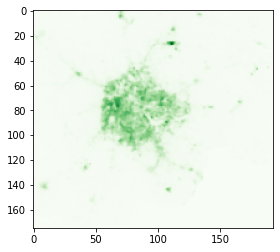

In [39]:
from matplotlib import pyplot
pyplot.imshow(df.read(1),cmap='Greens')

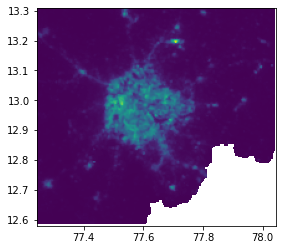

In [40]:
from rasterio.plot import show
show(df)

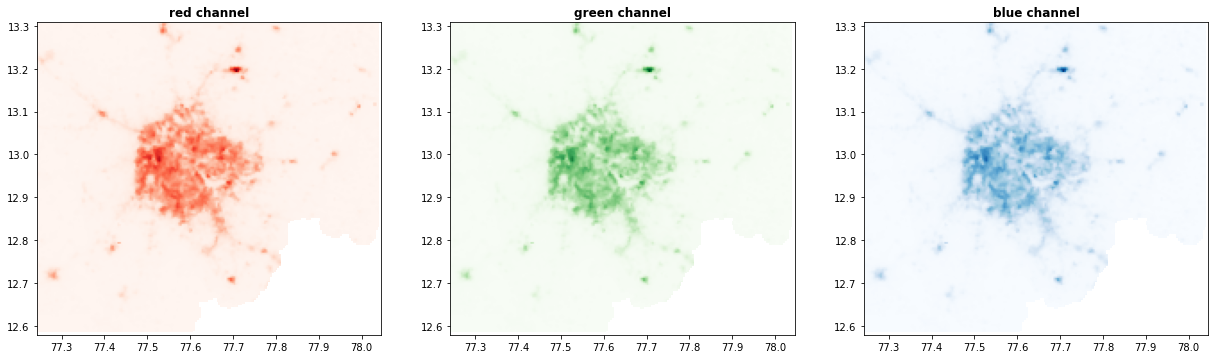

In [41]:
fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(21,7))
show(df, ax=axr, cmap='Reds', title='red channel')
show(df, ax=axg, cmap='Greens', title='green channel')
show(df, ax=axb, cmap='Blues', title='blue channel')

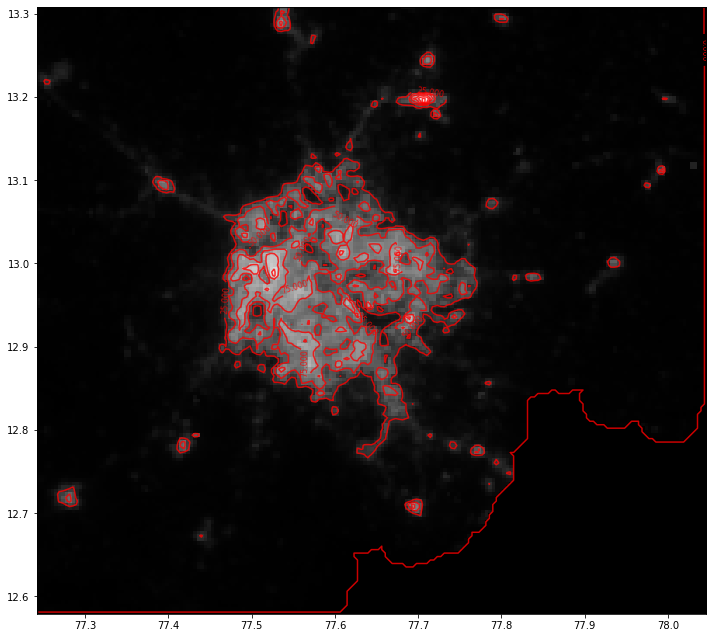

In [42]:
fig, ax = pyplot.subplots(1, figsize=(12, 12))
show((df, 1), cmap='Greys_r', interpolation='none', ax=ax)
show((df, 1), contour=True, ax=ax)

In [43]:
from rasterio.plot import show_hist

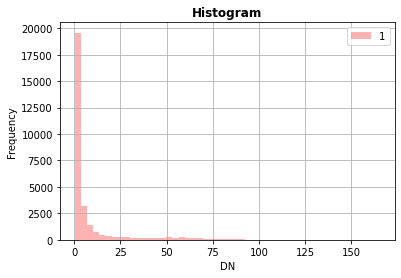

In [44]:
show_hist(df, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

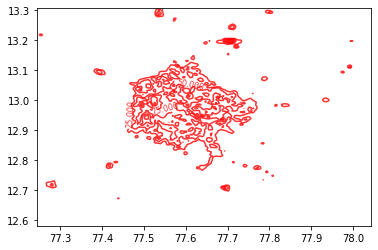

In [45]:
rasterio.plot.show(df, with_bounds=True, contour=True, contour_label_kws=None, ax=None, title=None, transform=df.transform, adjust='linear')

In [46]:
df.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 193, 'height': 175, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.004166666700000005, 0.0, 77.2416672846001,
       0.0, -0.004166666699999999, 13.308333439799998), 'tiled': False, 'interleave': 'band'}

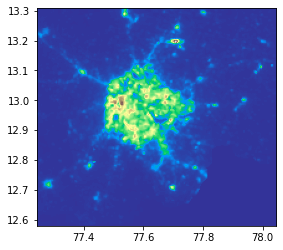

In [47]:
show((df, 1), cmap='terrain')

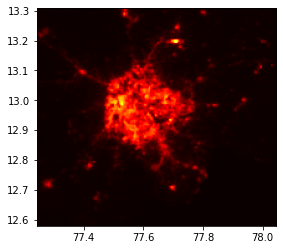

In [48]:
show((df, 1), cmap='hot')

# Zonal Stats

In [49]:
!pip install rasterstats

     |████████████████████████████████| 133kB 9.4MB/s 


In [50]:
from rasterstats import zonal_stats, point_query
df_sh = zonal_stats("/content/drive/MyDrive/Colab Notebooks/data_taskDataExtracted/shapefileGrids/shapeFileGrids.shp","/content/drive/MyDrive/Colab Notebooks/data_taskDataExtracted/Sky2019.tif", geojson_out=True)
print(df_sh)
df_sh[0]['type']

[{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('citygrid_n', 'bang_cell_17024'), ('wd_s_d_sd_', '29_572_99999_803162_159'), ('wd_ward_na', 'Kengeri'), ('wd_city_na', 'Bangalore'), ('latitude', 12.9036865814422), ('longitude', 77.4614027302498), ('min', 23.56999969482422), ('max', 23.56999969482422), ('mean', 23.56999969482422), ('count', 1)]), 'geometry': {'type': 'Polygon', 'coordinates': [[(77.46348606524985, 12.905769916442152), (77.46348606524985, 12.901603246442152), (77.45931939524985, 12.901603246442152), (77.45931939524985, 12.905769916442152), (77.46348606524985, 12.905769916442152)]]}}, {'type': 'Feature', 'id': '1', 'properties': OrderedDict([('citygrid_n', 'bang_cell_17025'), ('wd_s_d_sd_', '29_572_99999_803162_159'), ('wd_ward_na', 'Kengeri'), ('wd_city_na', 'Bangalore'), ('latitude', 12.8995199114422), ('longitude', 77.4614027302498), ('min', 23.149999618530273), ('max', 23.149999618530273), ('mean', 23.149999618530273), ('count', 1)]), 'geometry': {'type': '

'Feature'

In [51]:
df_sh[0]['properties'].keys()

odict_keys(['citygrid_n', 'wd_s_d_sd_', 'wd_ward_na', 'wd_city_na', 'latitude', 'longitude', 'min', 'max', 'mean', 'count'])

In [52]:
print(df_sh[0])

{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('citygrid_n', 'bang_cell_17024'), ('wd_s_d_sd_', '29_572_99999_803162_159'), ('wd_ward_na', 'Kengeri'), ('wd_city_na', 'Bangalore'), ('latitude', 12.9036865814422), ('longitude', 77.4614027302498), ('min', 23.56999969482422), ('max', 23.56999969482422), ('mean', 23.56999969482422), ('count', 1)]), 'geometry': {'type': 'Polygon', 'coordinates': [[(77.46348606524985, 12.905769916442152), (77.46348606524985, 12.901603246442152), (77.45931939524985, 12.901603246442152), (77.45931939524985, 12.905769916442152), (77.46348606524985, 12.905769916442152)]]}}


In [53]:
type(df_sh)

list

# Point Query

In [54]:
df_pt = point_query("/content/drive/MyDrive/Colab Notebooks/data_taskDataExtracted/shapefileGrids/shapeFileGrids.shp","/content/drive/MyDrive/Colab Notebooks/data_taskDataExtracted/Sky2019.tif")


In [55]:
print(df_pt[0], sum(df_pt[0])/5)
print(df_pt[1],sum(df_pt[1])/5)
print(df_pt[2],sum(df_pt[2])/5)
print(df_pt[3],sum(df_pt[3])/5)

[15.530106026617668, 27.270113505947066, 20.331217142903068, 12.293832552367022, 15.530106026617668] 18.191075050890497
[20.331217142903068, 27.270113505947066, 31.74683162927022, 20.143664813685433, 20.331217142903068] 23.964608846941772
[20.100206180963625, 15.530106026617668, 12.540723335374821, 23.795654766439235, 20.100206180963625] 18.413379298071796
[15.530106026617668, 20.100206180963625, 25.42017266075279, 27.270113505947066, 15.530106026617668] 20.770140880179763


In [56]:
print(len(df_pt))

3417


# Folium

In [57]:
!pip install folium

In [58]:
import folium


m = folium.Map(location=[12.90576991644215,77.45931939524985 ])
m

In [59]:
m.save("index.html")

In [60]:
folium.Map(location=[12.9716,77.5946], zoom_start=12)

In [61]:

geo_json = "/content/drive/MyDrive/Colab Notebooks/data_taskDataExtracted/geoJSONGrids.geojson"



m = folium.Map(
    location=[12.9716,77.5946],
    tiles="cartodbpositron",
    zoom_start=8,
)

folium.GeoJson(geo_json, name="geojson").add_to(m)

folium.LayerControl().add_to(m)


m

# Answer to the questions

In [63]:
#1. High light grid shows that the area is more dense in terms of population and is financial more stable.
#2. Different grid has different light because their is a difference in the population for the location. As high light shows that the area is dense and it consumes more electricity. High light also shows that the area is urban.
#3. Procter & Gamble is a very well-known consumer products company, owning major brands like Crest, Gillette, Pampers, and Tide. The grid location which shows high ligh is a place where they can market their product and reach to people in low cost. 
#   Also, their is an opportunities at grid location where light is low, because there are very less FMCG's which could hit the tier2 and 3 market as they are mainly dominated by local brand.